In [2]:
import migrids_lite as mlt
import pandas as pd
from matplotlib import pyplot as plt

In [19]:
# get all the data
all_data = pd.read_csv('example_data.tab', delimiter='\t')

# get the electric load from the data
electric_load = mlt.EnergyType.EnergyType('electric_load', all_data['load'])

# get the resource available
# the just 1 resource isn't enough to use the battery, so we make the resource bigger by a multiplier
solar_energy = mlt.EnergyType.EnergyType('resource', all_data['solar_energy'], multiplier=3)

In [20]:
# create a generator, this one is 400 kW
four_hund = mlt.Generator.Generator('four_hund', 400, 0.30, {0.50: 14, 1.00: 28})
five_hund = mlt.Generator.Generator('five_hund', 500, 0.4, {0.5: 20, 1: 35})

# build the power house, this is required even if there's only 1 generator
power_house = mlt.Powerhouse.Powerhouse((four_hund, five_hund))

In [31]:
# build the battery called 'example_batt', rated input is 50 kW, output is 100 kW,
# and capacity is 500 kWh, minimum capacity percent is 30
battery = mlt.Storage.Storage('example_batt', 50, 100, 100, 0.3)

In [32]:
# calculate diesel only usage
diesel_src = mlt.System.System(electric_load, power_house, 'd')

calculating in diesel only mode


In [33]:
# calculate in resource offset mode
resource_offset = mlt.System.System(electric_load, power_house, 'r', resource_input=solar_energy)

calculating in resource offset mode


In [34]:
# calculate in storage time shifting mode
gen_shifting = mlt.System.System(electric_load, power_house, 's', storage=battery, resource_input=solar_energy)

calculating in storage timeshift mode


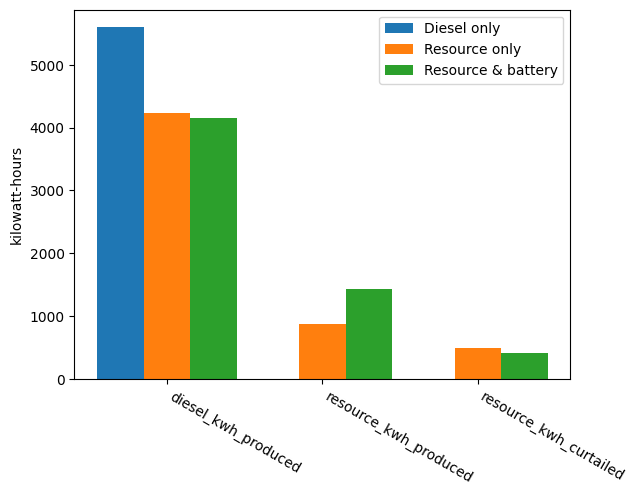

In [35]:
# plotting the kwh values

# quality of life function to get the values we want from a dictionary given a tuple of keys
from operator import itemgetter

kwh = ('diesel_kwh_produced', 'resource_kwh_produced', 'resource_kwh_curtailed')
width = 0.3
x = [0, 1, 2]
x_offset = [i + width for i in x]
x_offset_too = [i + width for i in x_offset]

fig, ax = plt.subplots()

ax.bar(x, itemgetter(*kwh)(diesel_src.vitals.totals), label='Diesel only', width=width)
ax.bar(x_offset, itemgetter(*kwh)(resource_offset.vitals.totals), label='Resource only', width=width)
ax.bar(x_offset_too, itemgetter(*kwh)(gen_shifting.vitals.totals), label='Resource & battery', width=width)
ax.set_xticks(x_offset)
ax.tick_params('x', rotation = -30)
ax.set_xticklabels(kwh, ha='left')
plt.ylabel('kilowatt-hours')
plt.legend()
plt.show()